# IMDB Movie Analysis

#### Objective:

As a data analyst intern at IMDB, you have been tasked with exploring and analyzing the IMDB Movies dataset. Your goal is to answer specific business questions, gain insights into movie trends, and deliver actionable recommendations. Using Python and libraries such as Pandas, NumPy, Seaborn, and Matplotlib, perform analysis to help IMDB better understand genre popularity, rating trends, and factors influencing movie success.

### 1. Project Setup and Data Loading

#### A. What libraries are required for this project, and why are they useful in data analysis?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

* Libraries Used: Pandas, NumPy, Seaborn, Matplotlib, and Datetime for data analysis and visualization.

#### B.  Load the dataset. What is the shape of the dataset? What does each row and column represent?

The dataset contains 10,178 rows and 12 columns.
Each row represents a movie, while each column represents specific movie attributes.
Here are the columns present in the dataset:

1.names: Movie title
2.date_x: Release date (currently an object type)
3.score: IMDB rating
4.genre: Movie genre
5.overview: Movie description
6.crew: Crew members involved
7.orig_title: Original movie title
8.status: Movie release status
9.orig_lang: Original language
10.budget_x: Movie budget
11.revenue: Movie revenue
12.country: Country of origin

In [3]:
dataset = pd.read_csv("imdb_movies.csv")
print(dataset)

                                         names       date_x  score  \
0                                    Creed III  03/02/2023    73.0   
1                     Avatar: The Way of Water  12/15/2022    78.0   
2                  The Super Mario Bros. Movie  04/05/2023    76.0   
3                                      Mummies  01/05/2023    70.0   
4                                    Supercell  03/17/2023    61.0   
...                                        ...          ...    ...   
10173                       20th Century Women  12/28/2016    73.0   
10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10175                         The Russia House  12/21/1990    61.0   
10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, 

In [7]:
dataset.shape

(10178, 12)

### 2. Data Overview and Basic Exploration

#### A. Use .info() to understand the data types and missing values. What potential issues can you spot?

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10178 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10178 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


#### B. Describe the main characteristics of each column using .describe(). What can you infer from the mean, median, and distribution of numerical columns?

In [5]:
dataset.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [6]:
dataset.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


### 3. Data Cleaning

#### A. Which columns contain missing values? How would you handle them?


In [24]:
dataset.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [25]:
dataset["genre"] = dataset["genre"].fillna("Unavailable")
dataset["crew"] = dataset["crew"].fillna("Unavailable")

* genre: 85 missing values → Since genre is essential for analysis, I will fill missing values with "Unavailable"
* crew: 56 missing values → Since we are not focusing on crew analysis, we can fill missing values with "Unavailable"

In [26]:
dataset.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

#### B. Are there any columns where data types need conversion (e.g., date, ratings)? Explain your decision.

In [4]:
dataset["date_x"] = pd.to_datetime(dataset["date_x"])

* Date Conversion: Converted date_x to datetime for accurate time-based analysis.

### 4. Univariate Analysis: Explore each column individually.

#### A.What is the distribution of movie years? Plot a histogram and describe its shape.

In [5]:
dataset["years"] = dataset["date_x"].dt.strftime("%Y")
dataset

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,years
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


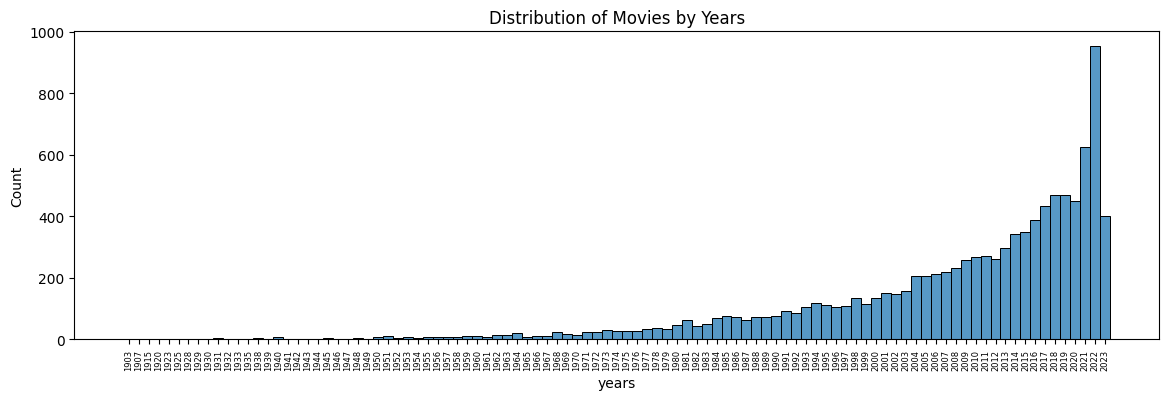

In [9]:
plt.figure(figsize = (14,4))
sns.histplot(dataset["years"])
dataset = dataset.sort_values(by = "years", ascending = True )
plt.xticks(rotation = 90 , fontsize = 6 )
plt.title("Distribution of Movies by Years")
plt.show()


* Movies released after 2000 dominate the dataset.
* Spike in releases post-2010, likely due to the rise of digital platforms.
* 2022 year has highest movie release.

#### B. What are the top 10 genres in the dataset? Use a bar chart to show their distribution.

In [52]:
gb = dataset.groupby(["genre"]).agg({"years": "count"})
gb = gb.sort_values(by = "years", ascending = False )
gb = gb.head(10)

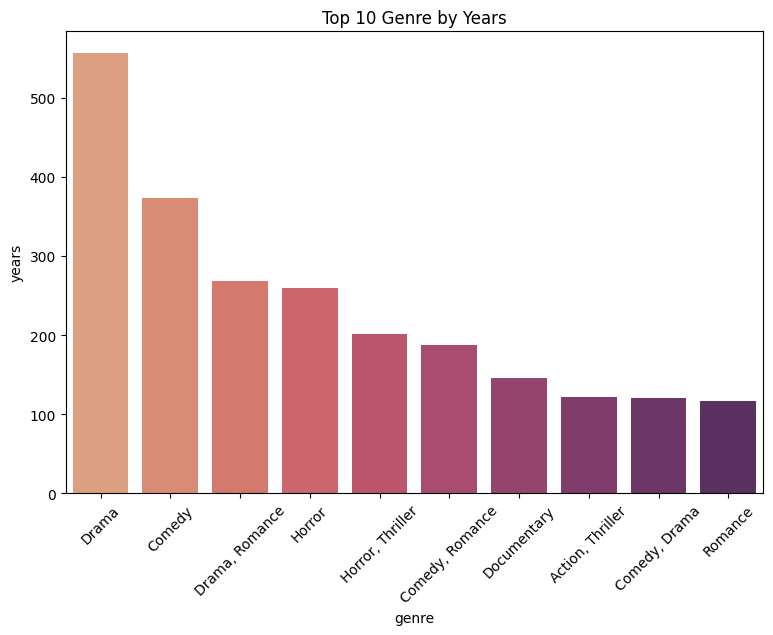

In [102]:
plt.figure(figsize = (9,6))
sns.barplot(x = gb.index, y = gb["years"] ,data = gb, hue = gb.index, palette = "flare" )
plt.xticks(rotation = 45)
plt.title("Top 10 Genre by Years")
plt.show()


* Here is a bar chart displaying the top 10 most common movie genres in the dataset. The most frequent genres include a mix of drama, and comedy films.

### 5. Bivariate Analysis: Explore relationships between two variables.

#### A. Is there a relationship between a movie’s years and its score ? Plot a scatter plot and describe any observed trend.

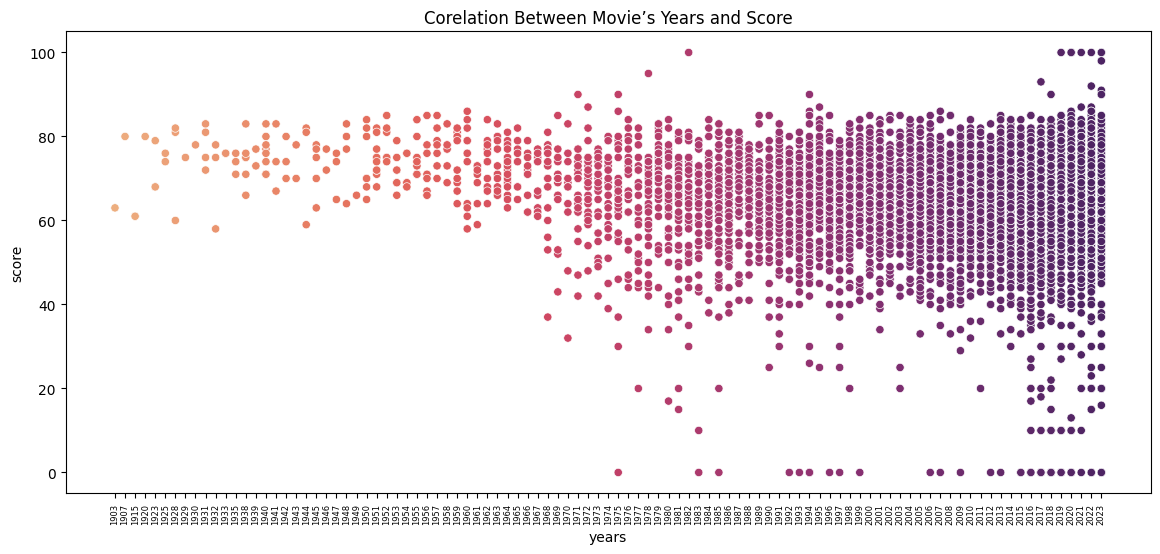

In [103]:
plt.figure(figsize = (14,6))
sns.scatterplot(x = dataset["years"], y = dataset["score"] , data = dataset , legend = False,hue = dataset["years"], palette = "flare")
dataset = dataset.sort_values( by = "years" , ascending = True)
plt.title("Corelation Between Movie’s Years and Score")
plt.xticks(rotation = 90 , fontsize = 6)
plt.show()

#### B.How do ratings (score) vary by genre? Use a boxplot to visualize the differences in ratings across genres.

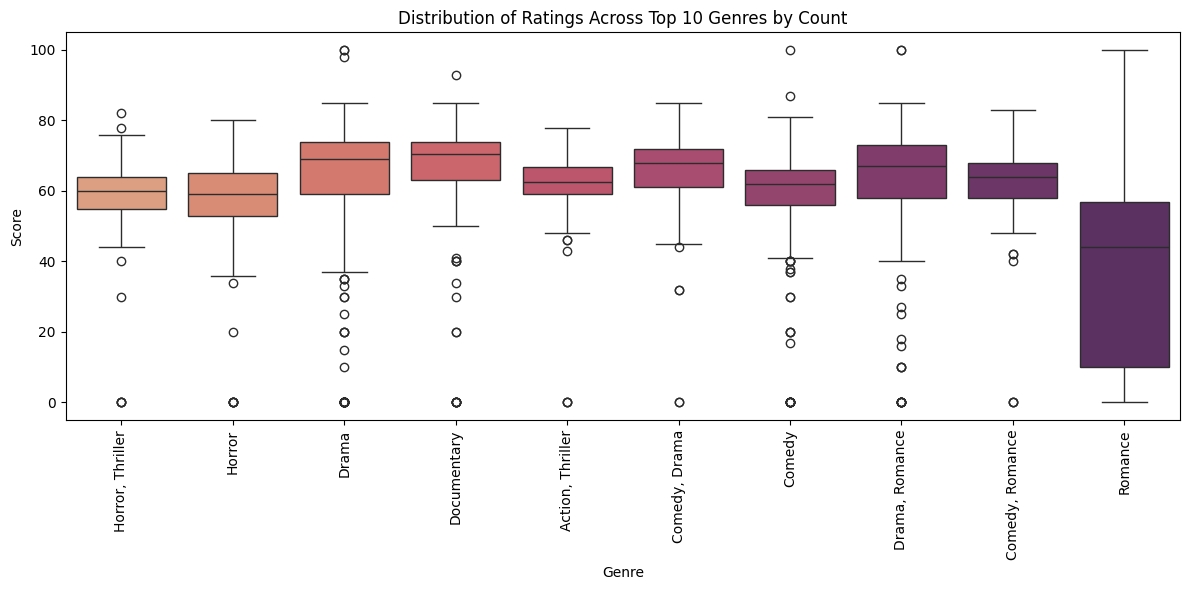

In [17]:
# Get the top 10 genres by count
top_genres = dataset['genre'].value_counts().nlargest(10).index

filtered_dataset = dataset[dataset['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="score", data=filtered_dataset, hue="genre", palette="flare")
plt.title("Distribution of Ratings Across Top 10 Genres by Count")
plt.xlabel("Genre")
plt.ylabel("Score")
plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()
plt.show()



#### This boxplot shows the distribution of IMDB ratings across the top 10 genres.

Some genres have a wider spread of ratings, while others have a more consistent distribution.
The median rating and interquartile range vary between genres, indicating differences in audience reception.

#### C. Is there a correlation between the number of votes a budget and revenue? 
  Create a scatter plot and calculate the correlation coefficient. What can you conclude?

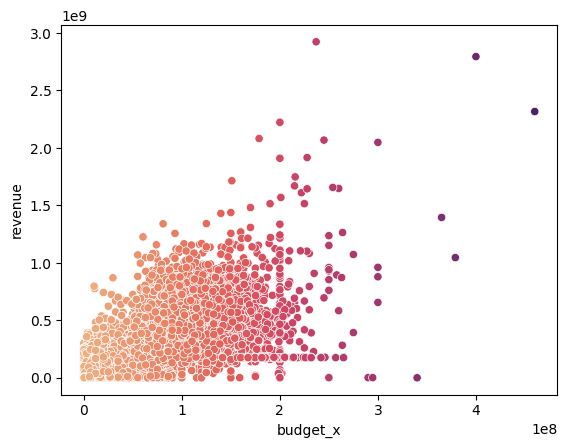

In [159]:
sns.scatterplot(x = dataset["budget_x"], y = dataset["revenue"] , data = dataset, legend = False ,hue = dataset["budget_x"], palette = "flare")
plt.show()

In [130]:
correlation = np.corrcoef(dataset_clean['budget_x'], data_clean['revenue'])[0, 1]
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.6738295691763745


#### The scatter plot shows a positive correlation between budget and revenue, indicating that higher-budget movies tend to generate more revenue.

The correlation coefficient is 0.67, which suggests a moderate to strong positive relationship between budget and revenue.
Some movies have high revenue despite a lower budget, implying potential high ROI films.

### 6. Genre-Specific Analysis

#### A.  Which genre has the highest average rating(score)? Calculate the average rating for each genre and plot the results.

In [146]:
Gb = dataset.groupby(["genre"]).agg({"score":"mean"})
Gb = Gb.sort_values(by = "score", ascending = False )
Gb = Gb.head(10)



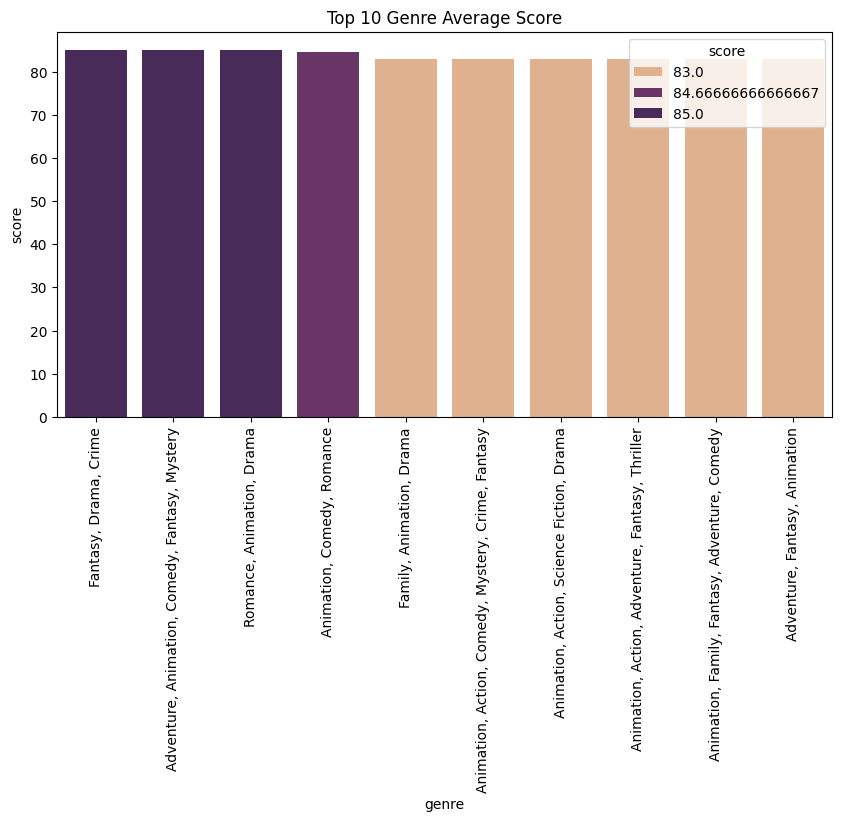

In [156]:
plt.figure(figsize = (10,5))
sns.barplot(x = "genre", y = "score" , data = Gb , hue = "score" , palette = "flare")
plt.xticks(rotation = 90 )
plt.title("Top 10 Genre Average Score")
plt.show()

#### This bar chart displays the top 10 genres with the highest average IMDB ratings.

Some genres consistently receive higher ratings from audiences.
This insight helps identify which genres tend to be critically well-received.

#### B.  How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

In [166]:
gb = dataset.groupby(["years", "genre"]).agg({"date_x":"count"})
gb

date_x
years genre                                 
1903  Drama, History                       1
1907  Adventure, Science Fiction           1
1915  Drama, History, War                  2
1920  Drama, Horror, Thriller, Crime       1
1923  Comedy, Romance, Thriller            1
...                                      ...
2023  War, Action                          1
      War, Drama, History                  1
      War, History, Drama                  1
      Western                              1
      Western, Action                      1

[6438 rows x 1 columns]

### 7. Year and Trend Analysis

#### A.  How has the average movie rating (score) changed over the years? Plot the average rating for each year.

In [171]:
Gb = dataset.groupby(["years"]).agg({"score":"mean"})
Gb = Gb.sort_values(by = "score", ascending = False )


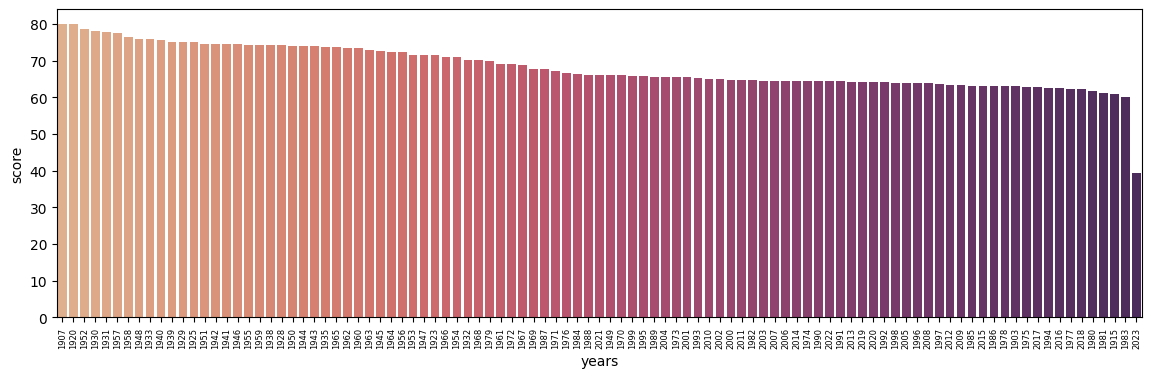

In [182]:
plt.figure(figsize = (14,4))
sns.barplot( x= "years" , y = "score" , data = Gb, hue = "years", palette = "flare", )
plt.xticks(rotation = 90, fontsize = 6 )
plt.show()

#### B. Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.

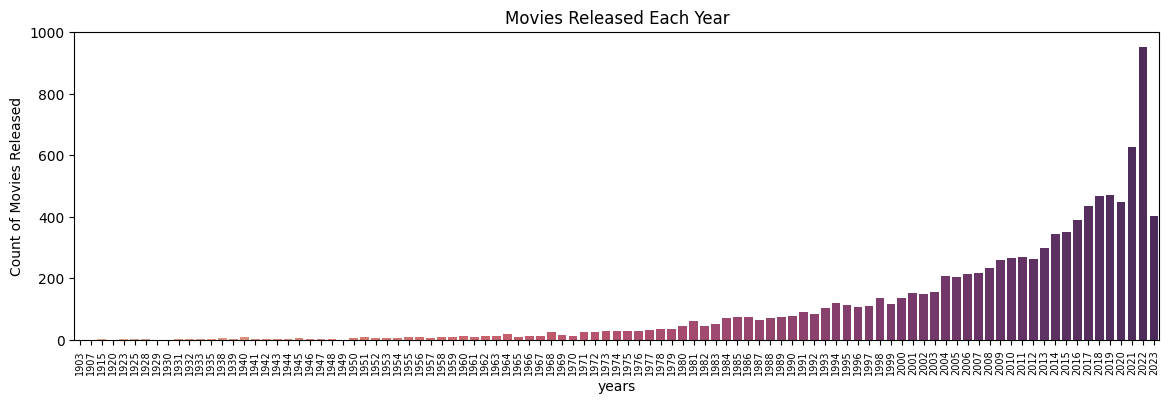

In [29]:

gb4 = dataset.groupby('years').agg({'names': 'count'})

plt.figure(figsize=(14,4))
sns.barplot(x=gb4.index, y=gb4['names'], hue=gb4.index, palette= "flare")
plt.ylabel('Count of Movies Released')
plt.xlabel('years')
plt.title('Movies Released Each Year')
plt.xticks(rotation=90, fontsize=7)
plt.show()


* years (2022) have the highest number of releases.


### 8. Multivariate Analysis: Analyze multiple variables together.

#### A. Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

In [34]:
dataset['decade'] = (dataset['date_x'].dt.year // 10) * 10
dataset

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,years,decade
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,2020
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,2020
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,2020
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,2020
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016,2010
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995,1990


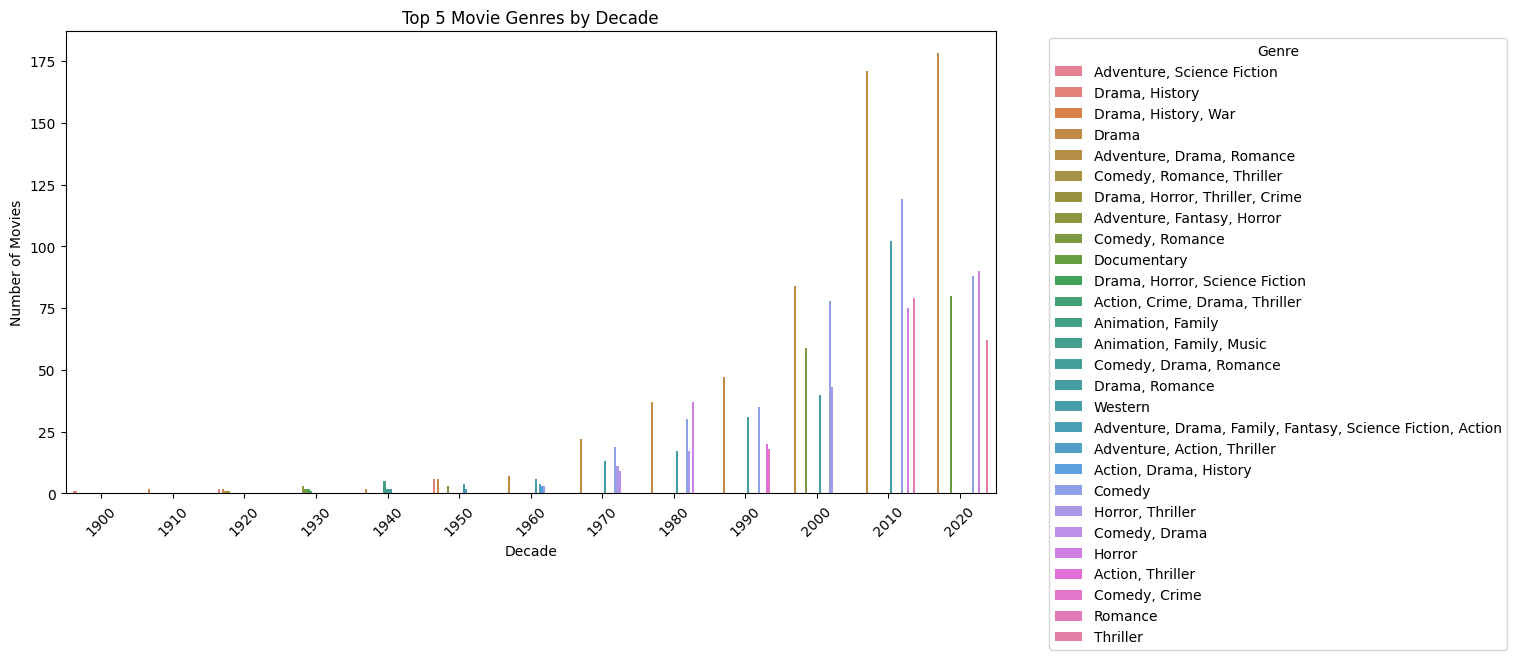

In [89]:

# Grouping dataset properly with exploded genres
dataset['date_x'] = pd.to_datetime(dataset['date_x'], errors='coerce')
dataset['decade'] = (dataset['date_x'].dt.year // 10) * 10

# Split and explode genres
genre_counts = dataset.assign(genre=dataset['genre'].str.split(', ')).explode('genre')

# Group and count
gb = genre_counts.groupby(["decade", "genre"]).agg({"names": "count"}).reset_index()

# Rename for clarity
gb = gb.rename(columns={"names": "count"})

# Sort by decade and count to get top 5 per decade
top_5_genre = gb.sort_values(by=["decade", "count"], ascending=[False, False]).groupby("decade").head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_genre, x="decade", y="count", hue="genre", dodge=True)
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Top 5 Movie Genres by Decade")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()



* Western & drama dominated early cinema (1900s-1950s).
* Adventure,drama,romance,Action, and Superhero movies dominate 2000s-present.

#### B.Plot a heatmap or pairplot to examine relationships between budget, revenue, scores.

In [100]:
numeric_cols = ["budget_x", "revenue", "score"]

dataset_numeric = dataset[numeric_cols].apply(pd.to_numeric, errors='coerce').dropna()


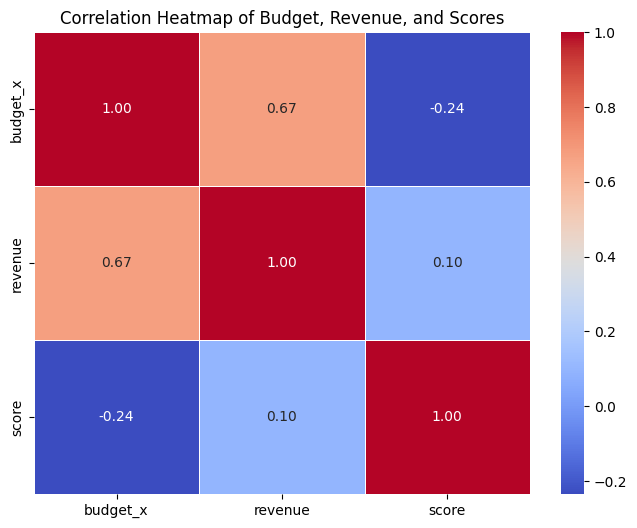

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Budget, Revenue, and Scores")
plt.show()

#### C. Are there specific genres or release years with higher-rated movies? Group by genre and year, then analyze the average rating.

In [6]:
gb = dataset.groupby(["years","genre"]).agg({"score": "mean"}).reset_index()
gb = gb.sort_values(by = "years",ascending = False)
gb

,years,genre,score
6404,2023,"Western, Action",60.0
6292,2023,"Comedy, Drama, Fantasy",63.0
6290,2023,"Comedy, Drama",46.5
6289,2023,"Comedy, Animation, Family, Action, Adventure",0.0
6288,2023,"Comedy, Animation",0.0
...,...,...,...
5,1923,Drama,68.0
3,1920,"Drama, Horror, Thriller, Crime",80.0
2,1915,"Drama, History, War",61.0
1,1907,"Adventure, Science Fiction",80.0


## Insights and Summary

### ️Movie Ratings and Trends
Average IMDB Rating: The mean rating across movies is 63.5, with most movies scoring between 59 and 71 (out of 100).
Rating Distribution: Some genres consistently receive higher ratings, while others vary widely in audience reception.
Trend Over Time: The average movie rating has fluctuated over the years, with no consistent increase or decrease.

### Budget and Revenue Relationship
Higher Budgets = More Revenue:
The correlation between budget and revenue is 0.67, meaning movies with higher budgets tend to make more money.
However, some low-budget movies have earned high revenue, suggesting high ROI films exist (e.g., indie hits).

### Most Popular Genres
Most Common Genres:
The top 3 most frequent genres are Drama, Action, and Comedy.
Animation, Sci-Fi, and Adventure are also highly prevalent.
Highest-Rated Genres:
Some genres receive better ratings on average, indicating that audience satisfaction varies.

### Movie Releases Over Time
Increasing Movie Releases:
The number of movies released per year has grown significantly over time.
The past two decades have seen the highest number of movie productions.
Popular Genres by Decade:
Western & War films were popular in early decades.
Sci-Fi, Action, and Superhero movies have dominated recent decades.

### Ratings vs. Movie Release Year
Older Movies Tend to Have Higher Ratings:
Some of the highest-rated movies come from past decades.
Recent movies often receive more mixed reviews.
Possible Explanation:
Older films may have stood the test of time and developed cult followings.
Modern audiences have higher expectations, leading to more critical reviews.